## Introduction to machine learning.
## Natural language processing.
___
   
*Radoslav Petkov*

### About me
___

* Contact: https://www.linkedin.com/in/radoslav-petkov-8a4a53144/
* Sofia University, Computer Science, Bsc (2nd year)
* Has been working for Sirma since the end of 2014

### Summary
___

* Supervised vs Unsupervised machine learning
* Representation of words and sentences
* Autoencoders
* Sequence to sequence models
* Memory Networks


## Supervised vs Unsupervised

![](un_supervised.png)


# Supervised
___

###  $ y= a*X + b$

## Regression
___

### $y \in /R $

In [95]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
boston = load_boston()

dataset = pd.DataFrame(data=boston["data"], columns=boston["feature_names"])
dataset["Target"] = boston["target"]


In [96]:
print(boston["DESCR"])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [ ]:
dataset[dataset["Target"] < 10][:2]

In [ ]:
dataset[(dataset["Target"] > 10) & (dataset["Target"] < 30)][:2]

In [ ]:
dataset[dataset["Target"] > 45][:2]

## Classification
___

### $y \in [0..c]$

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
pd_iris = pd.DataFrame(data=iris["data"], columns=iris["feature_names"])
pd_iris["Type"] = iris["target"]

In [ ]:
print(iris["DESCR"])

In [ ]:
pd_iris [ pd_iris["Type"] == 0][:2]

In [ ]:
pd_iris [ pd_iris["Type"] == 1][:2]

In [ ]:
pd_iris [ pd_iris["Type"] == 2][:2]

## Unsupervised
#### $ y$ is missing

In [93]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause
# with slight modifications by me

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets
plt.close("all")
np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

estimators = [('k_means_iris_8', KMeans(n_clusters=8)),
              ('k_means_iris_5', KMeans(n_clusters=5)),
                       ('k_means_iris_3', KMeans(n_clusters=3))]

titles = ['8 clusters', '5 clusters', '3 clusters']
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(12,12))

for i, (name, est) in enumerate(estimators):
    ax = fig.add_subplot(2, 2, i+1, projection='3d')
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(titles[i])
    ax.dist = 12

# Plot the ground truth
ax = fig.add_subplot(2, 2, 4, projection='3d')
for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

fig.axes
for ax in fig.axes:
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
# fig.subplots_adjust(hspace=0)

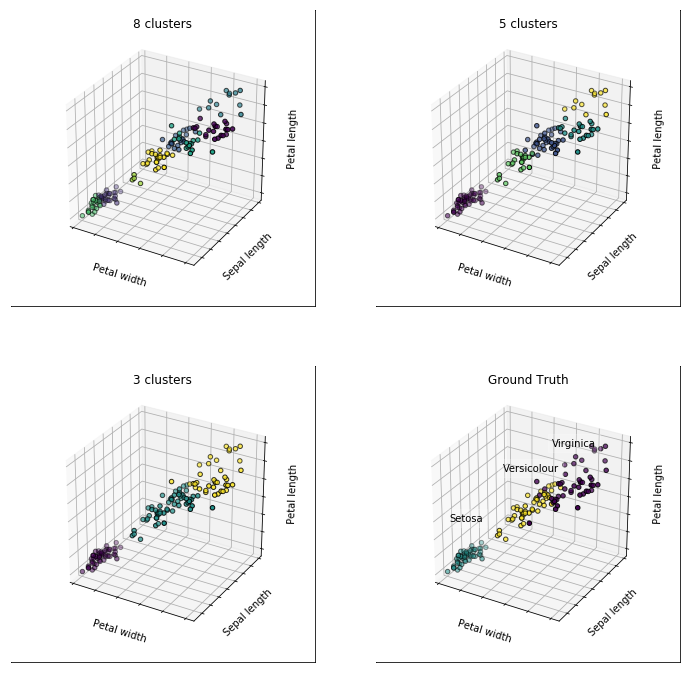

In [94]:
plt.show()

# Natural-language processing (NLP)
### How the computer works with text?

![](natural-language-processing.jpg)

*  ### What is one hot encoding of words?

Simply said, it is representation where each word is vector with size equal to the vocabulary size and there is 1 at the index equal to the word index.

Imagine you have the following corpus of words: *Machine*, *learning*, *rocks*.

***One representation would be :***

Machine -> [1 0 0],  learning -> [0 1 0], rocks -> [0 0 1]


* ### What about Bag of Words?

Each sentence is vector with size equal to the vocablary size storing the occurances of each word in the sentence.
There are several additional modifications such as:
* **TF-IDF**

    We assign weights of each word instead of occurances.The weights tend to filter out common terms. If the weight is 0 then the word is present in every sentence.
    TF is the count of the word in the current sentence.
    IDF is the count of the word in all sentences we are working with.
* **Hashing**

    Instead of using dictionary to vectorize, a special hash function is used.

### Examples
___

Lets have the following corpus: *machine*, *learning*, *rocks*, *this*, *robot*

And the following sentences:

* *machine learning rocks*
* *this machine learning rocks*
* *this robot rocks*

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = ["machine learning rocks", "this machine learning rocks", "this robot rocks"]
corpus_transformed = CountVectorizer().fit_transform(corpus)

In [ ]:
for (sentence, transf) in zip(corpus, corpus_transformed.toarray()):
    print(sentence, transf)

*  ### Hmm, now the fancy word vectors

Vectors from lattent space formed by the corpus used for training unsupervised model.
They can catch the 'semantic meaning of a word'.

![](word_embedding2.jpg)

![](word_embedding.png)

In [ ]:
from gensim.models import KeyedVectors

word_vectors = KeyedVectors.load_word2vec_format('/media/radoslav/6906F83679A14133/Download/glove/GoogleNews-vectors-negative300.bin', binary=True)

In [ ]:
word_vectors.wv.most_similar(positive=['walking', 'swam'], negative=['swimming'])[0]

In [ ]:
word_vectors.wv.most_similar(positive=['France', 'Sofia'], negative=['Paris'])[0]

In [ ]:
word_vectors.wv.most_similar(positive=['queen', 'man'], negative=['woman'])[0]

### Now lets try what such a model can do on one of those IQ quizzes

In [ ]:
word_vectors.wv.doesnt_match(["apple", "banana", "orange", "bread"])

## Autoencoders
___

![](autoencoder.png)

## Sequence to sequence models
___
![](encdec.jpg)

![](seq2seq.jpg)

## Memory Networks
___

# What can they do?

* Joe went to the *kitchen*. Fred went to the *kitchen*. Joe picked up the *milk*.
* Joe travelled to the *office*. Joe left the *milk*. Joe went to the *bathroom*.
* **Where is the milk now?** A: *office*
* **Where is Joe?** A: *bathroom*
* **Where was Joe before the office?** A: *kitchen*

# Wtf how?
![](study-of-end-to-end-memory-networks-9-638.jpg)

![](thank-you-for-your-attention-now-its-time-for-questions.jpg)

### Sources of some of the images:

* https://leonardoaraujosantos.gitbooks.io/artificial-inteligence/content/machine_learning.html
* https://medium.com/@curiousily/credit-card-fraud-detection-using-autoencoders-in-keras-tensorflow-for-hackers-part-vii-20e0c85301bd
* https://www.analyticsvidhya.com/blog/2017/06/word-embeddings-count-word2veec/
* https://www.celebros.com/blog/five-benefits-to-choosing-natural-language-processing-for-on-site-search.html
* https://www.tensorflow.org/tutorials/seq2seq
* https://image.slidesharecdn.com/presentationrev1-170221023043/95/study-of-end-to-end-memory-networks-9-638.jpg?cb=1487644455

### Useful references:

* https://github.com/fmi/machine-learning-lectures
* https://www.kaggle.com/
* https://leonardoaraujosantos.gitbooks.io/artificial-inteligence/content/machine_learning.html
* https://en.wikipedia.org/wiki/Feature_hashing
* https://en.wikipedia.org/wiki/Tf%E2%80%93idf
* https://www.tensorflow.org/tutorials/seq2seq
* https://github.com/facebook/MemNN

## <center>All links above are interesting and useful if you want to deep dive in the world of machine learning.</center>

 ### <center>The end, thanks!</center>